In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
hassan06_nslkdd_path = kagglehub.dataset_download('hassan06/nslkdd')

print('Data source import complete.')


Data source import complete.


### Thực hiện gọi các thư viện cần thiết

In [ ]:
%pip install pytorch_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# %pip install --no-cache-dir --upgrade xgboost
%pip install --no-cache-dir numpy==1.26.4 pandas==2.2.2

In [ ]:
import pickle
from pickle import NONE
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Scikit-learn: model selection & evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics

# Scikit-learn: models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Scikit-learn: dimensionality reduction
from sklearn.decomposition import PCA

# XGBoost
import xgboost as xgb

#System
import warnings

#Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Transformer Model
from pytorch_tabular import TabularModel
from pytorch_tabular.models import FTTransformerModel
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models.ft_transformer.config import FTTransformerConfig

# **Khám phá dữ liệu**

In [ ]:
data_path = '/kaggle/input/nslkdd/'
# Danh sách 43 tên cột cho tập dữ liệu NSL-KDD, bao gồm các đặc trưng đầu vào và nhãn đầu ra
# Cột outcome là nhãn phân loại (normal, neptune, v.v.).
# Cột level là độ khó (từ 0–21), nhưng thường bị loại bỏ khi huấn luyện mô hình.
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

# Tải dữ liệu từ ggdrive
df_train=pd.read_csv(data_path + "KDDTrain+.txt",names=columns)
df_test=pd.read_csv(data_path + "KDDTest+.txt",names=columns)

df_train = pd.concat([df_train, df_test], axis=0)
df_train = df_train.reset_index(drop=True)

In [ ]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.0,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.0,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
df_train['attack'].value_counts()

,count
attack,
normal,77054
neptune,45871
satan,4368
ipsweep,3740
smurf,3311
portsweep,3088
nmap,1566
back,1315
guess_passwd,1284


In [ ]:
# Nhóm các nhãn (outcome) trong NSL-KDD thành 5 loại: normal, DoS, Probe, U2R, R2L
attack_category = {
    'normal': 'normal',

    # DoS (Denial of Service)
    'back': 'DoS', 'land': 'DoS', 'neptune': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS',
    'apache2': 'DoS', 'udpstorm': 'DoS', 'processtable': 'DoS',

    # Probe (Surveillance/Scanning)
    'satan': 'Probe', 'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe', 'mscan': 'Probe', 'saint': 'Probe',

    # U2R (User to Root)
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R', 'xterm': 'U2R', 'ps': 'U2R',
    'sqlattack': 'U2R',

    # R2L (Remote to Local)
    'guess_passwd': 'R2L', 'ftp_write': 'R2L', 'imap': 'R2L', 'phf': 'R2L', 'multihop': 'R2L', 'warezmaster': 'R2L',
    'warezclient': 'R2L', 'spy': 'R2L', 'xlock': 'R2L', 'xsnoop': 'R2L', 'sendmail': 'R2L', 'named': 'R2L',
    'snmpgetattack': 'R2L', 'snmpguess': 'R2L', 'httptunnel': 'R2L', 'worm': 'R2L'
}

# attack = df_train['attack'].map(attack_category)
# attack.value_counts()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [ ]:
df_train.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
count,148517.000000,148517,148517,148517,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.0,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517,148517.000000
unique,NaN,3,70,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,NaN,121569,48191,89820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77054,NaN
mean,276.779305,NaN,NaN,NaN,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,0.001508,0.000976,0.273726,0.012073,0.000525,0.004013,0.0,0.000081,0.012308,83.336561,28.251937,0.256925,0.255337,0.137947,0.138487,0.672983,0.067761,0.097441,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,NaN,19.278480
std,2460.683131,NaN,NaN,NaN,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,0.038807,0.042389,22.689023,0.517863,0.027701,0.095257,0.0,0.008988,0.110259,116.760741,75.369635,0.431918,0.432578,0.339387,0.341783,0.436544,0.194666,0.258886,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,NaN,2.739757
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,18.000000
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,13.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,20.000000
75%,0.000000,NaN,NaN,NaN,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,141.000000,17.000000,0.850000,0.910000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,Na

In [ ]:
df_train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
df_train.loc[df_train['attack'] == 'normal', 'attack'] = 'normal'
df_train.loc[df_train['attack'] != 'normal', 'attack'] = 'attack'

In [ ]:
df_test.loc[df_train['attack'] == 'normal', 'attack'] = 'normal'
df_test.loc[df_train['attack'] != 'normal', 'attack'] = 'attack'

attack
normal    77054
attack    71463
Name: count, dtype: int64


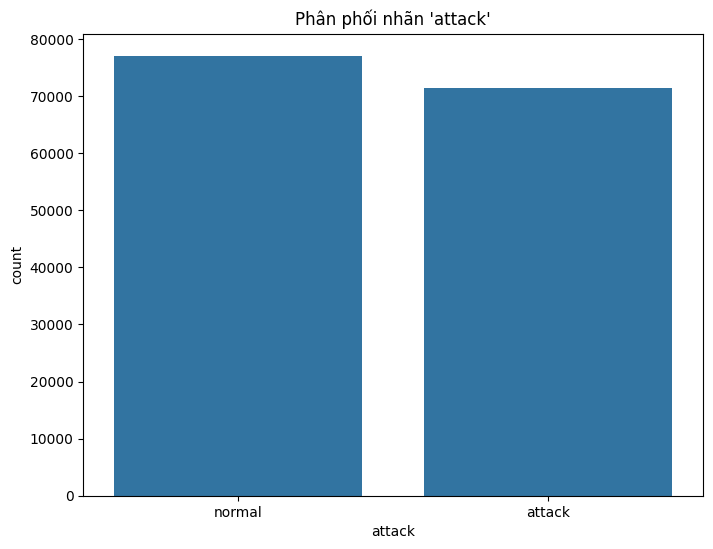

In [ ]:
attack_type_counts = df_train['attack'].value_counts()
print(attack_type_counts)
# Biểu đồ phân phối nhãn attack
plt.figure(figsize=(8,6))
sns.countplot(x=df_train['attack'])
plt.title("Phân phối nhãn 'attack'")
plt.show()

In [ ]:
#Vẽ biểu đồ tròn cho các cột phân loại
def pie_plot(df, columns, rows, cols):
  fig, axes = plt.subplots(rows, cols, figsize=(10,10))
  for ax, col in zip(axes.ravel(), columns):
    df[col].value_counts().plot(ax=ax, kind='pie', fontsize=15, autopct='%1.0f%%')
    ax.set_title(str(col), fontsize=12)

  plt.show()

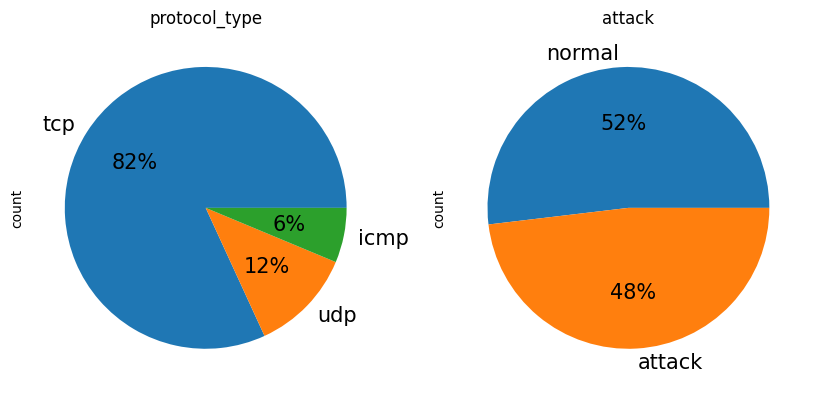

In [ ]:
pie_plot(df_train, ['protocol_type', 'attack'], 1, 2)

# **Visualize data**

<Figure size 2000x4000 with 0 Axes>

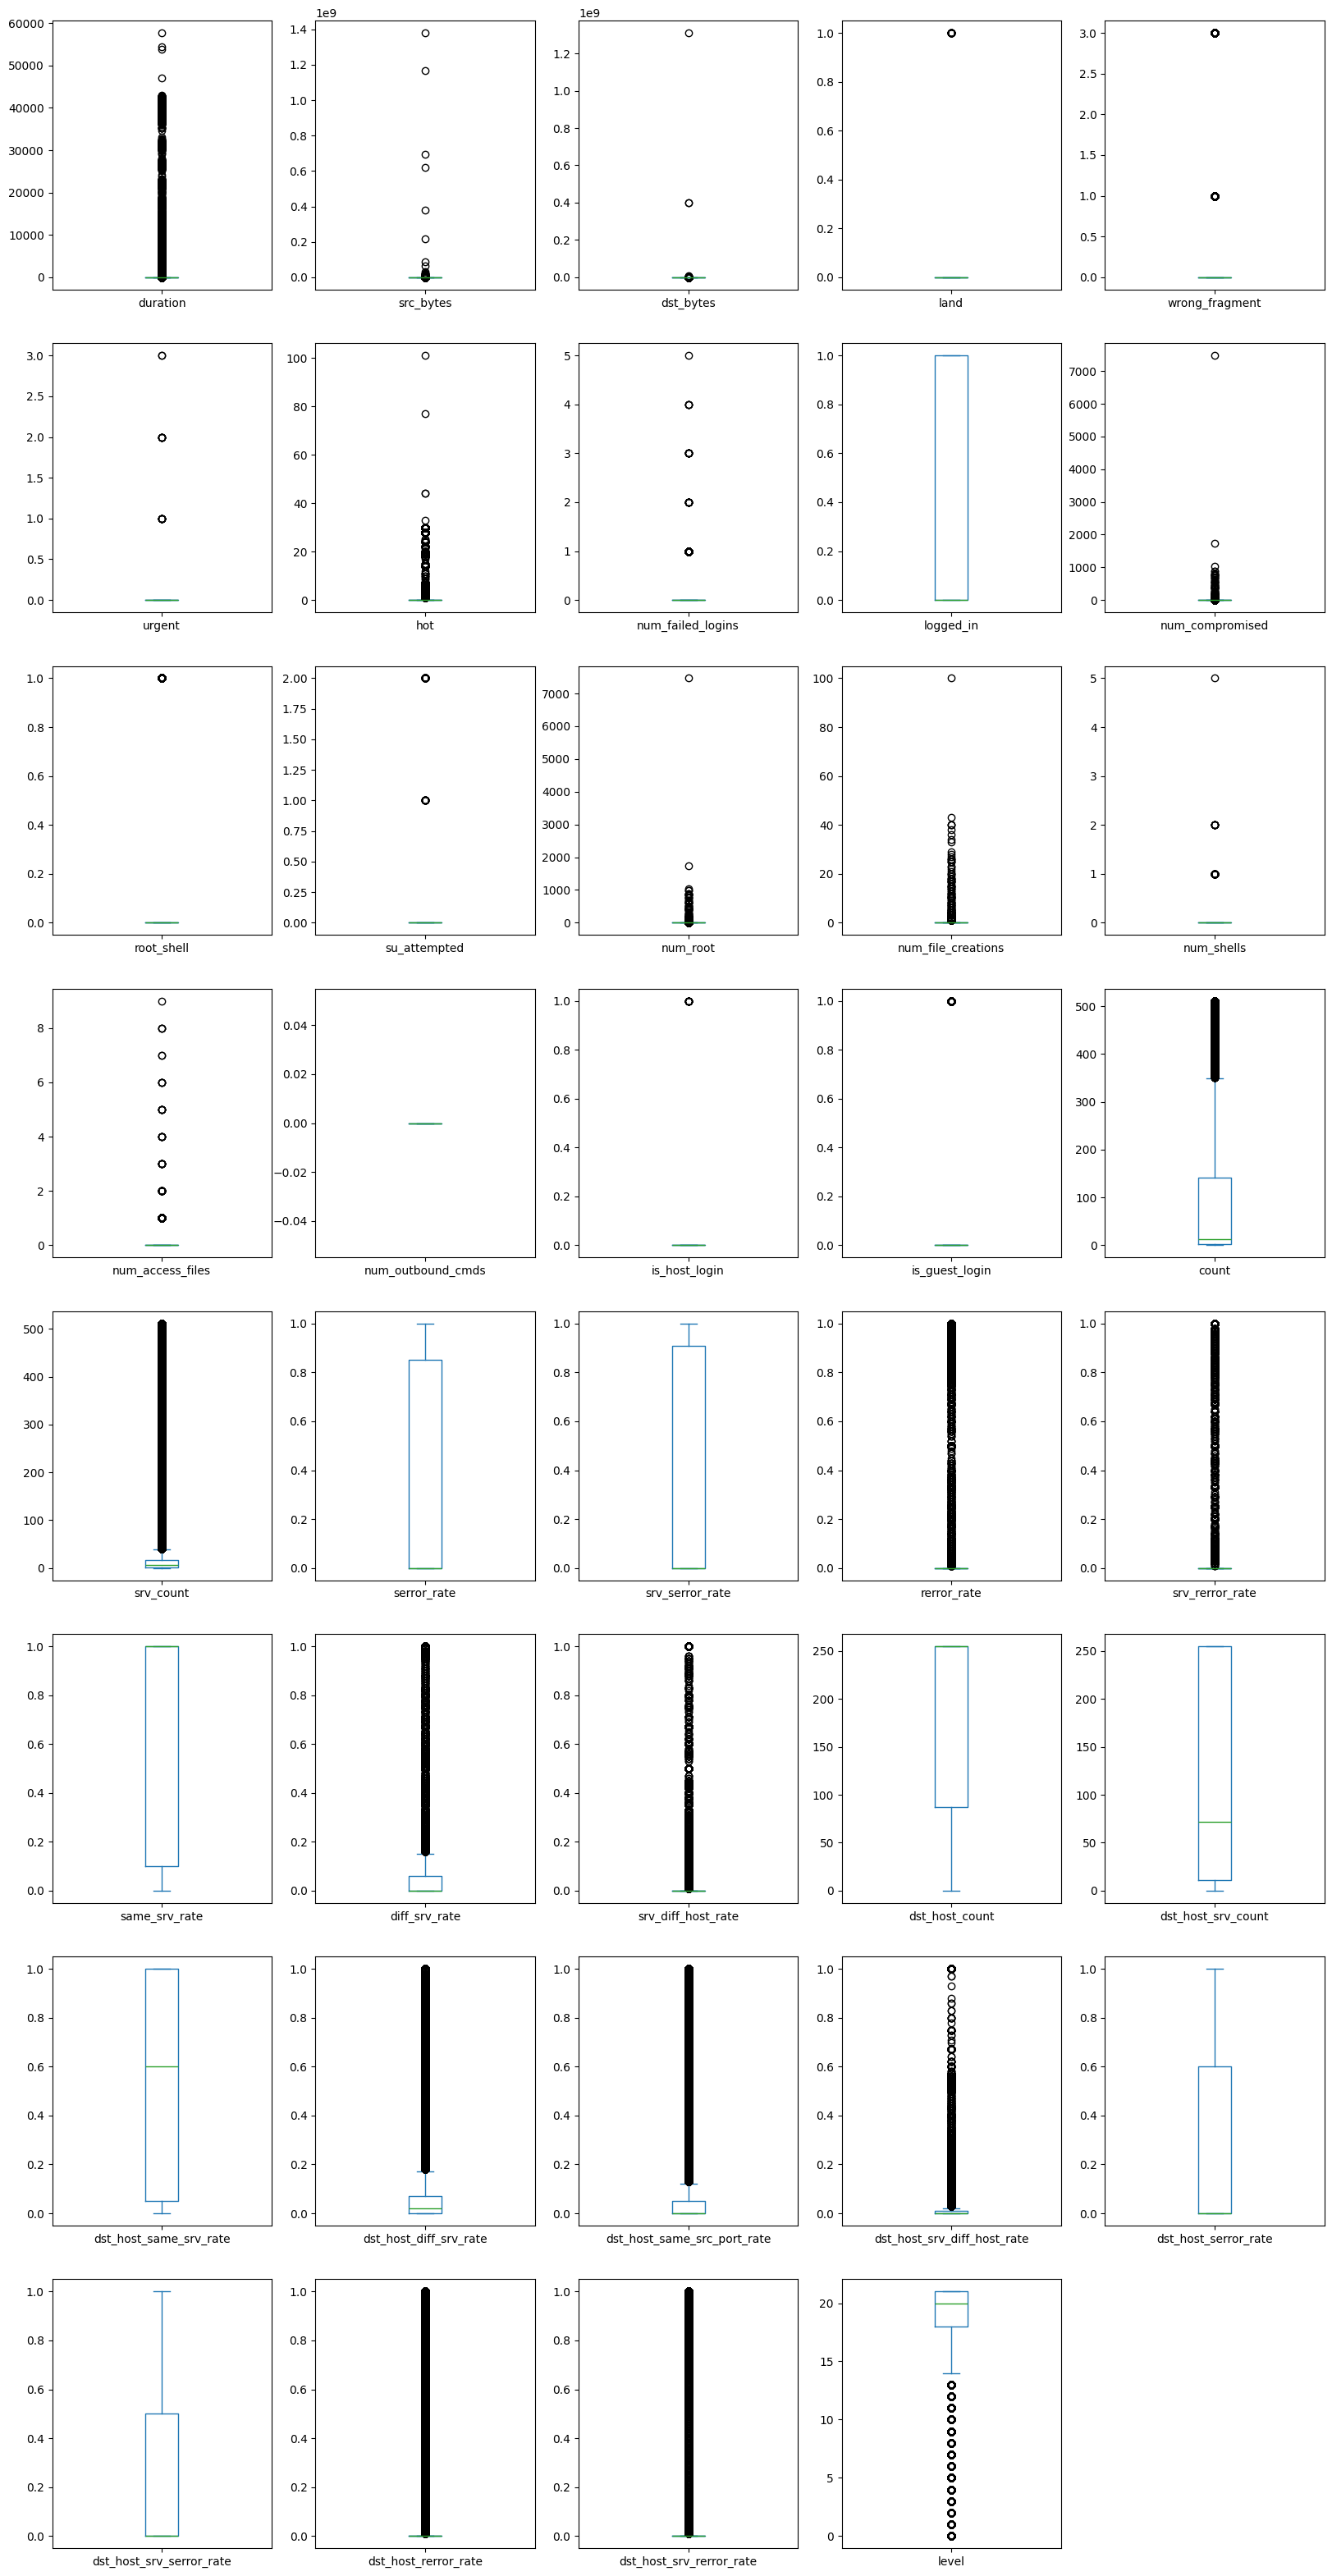

In [ ]:
# Biểu đồ hộp (boxplot)
# Biểu đồ tóm tắt và so sánh sự phân phối của tập dữ liệu
# Hiển thị boxplot cho từng cột số trong DataFrame df_train để phát hiện phân phối và ngoại lai.
plt.figure(figsize=(20, 40))
df_train.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

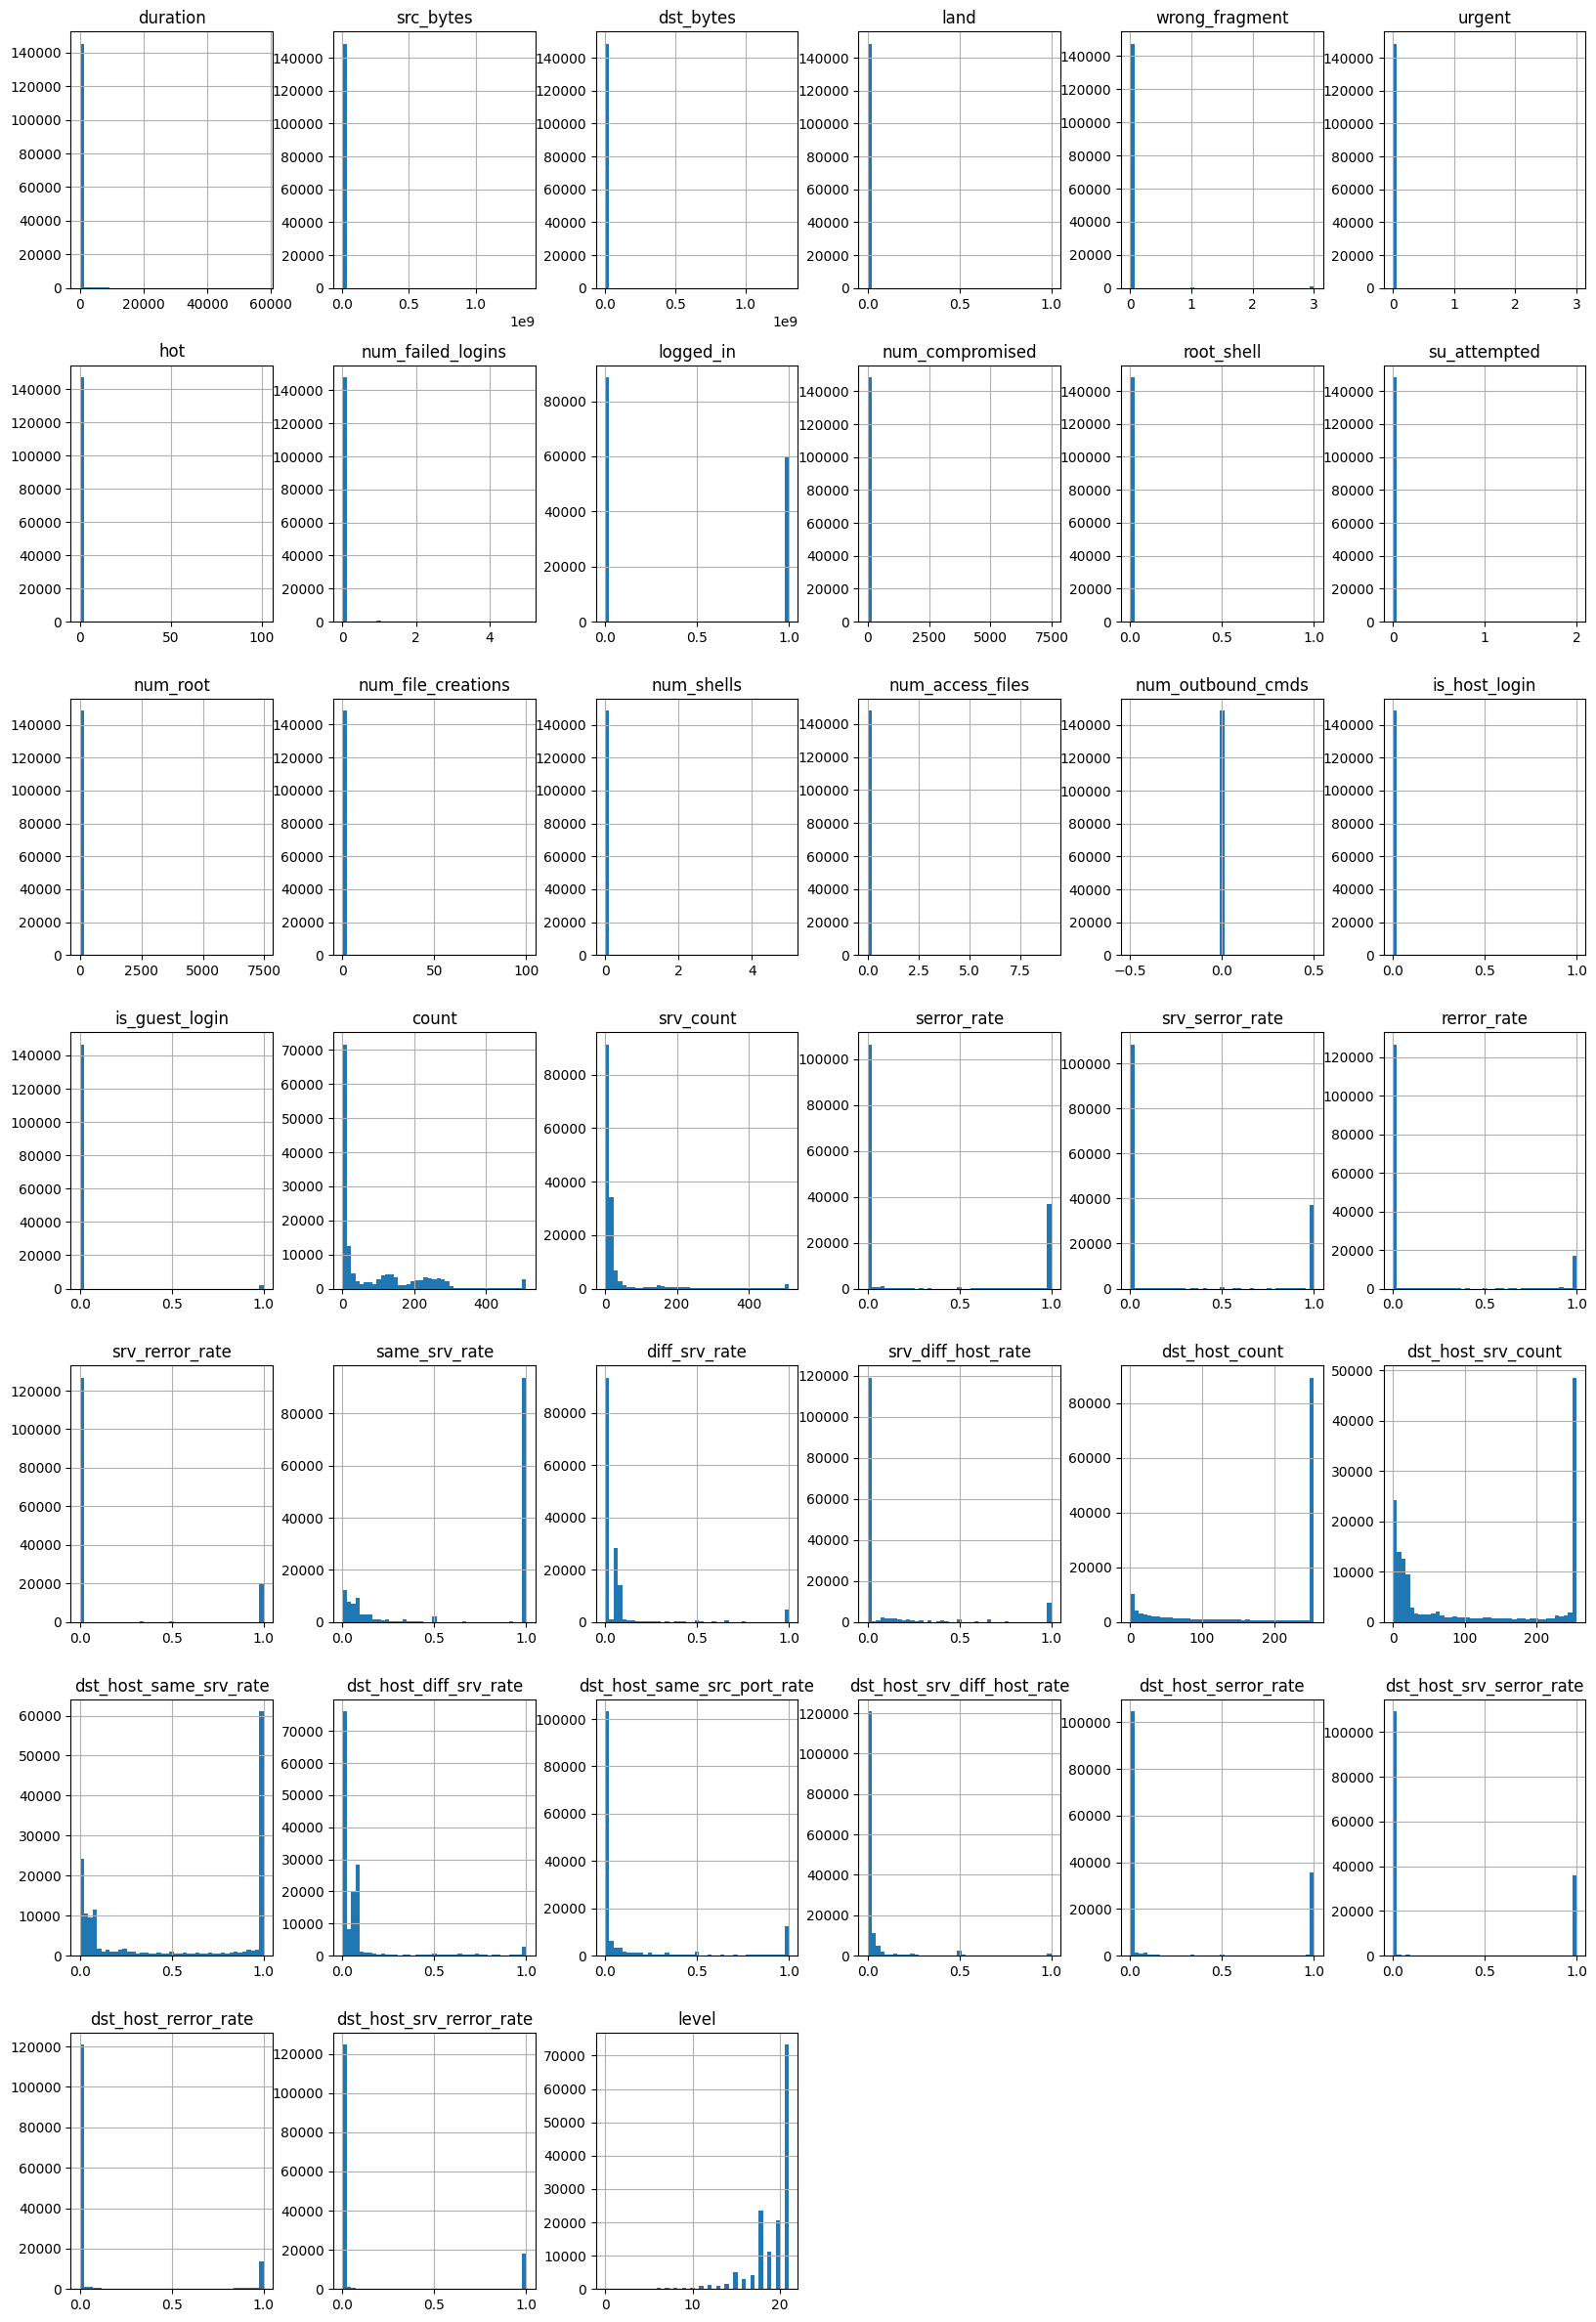

In [ ]:
# Biểu đồ Histogram
# Trực quan hóa sự phân phối tần suất của từng thuộc tính số trong DataFrame df_train.
df_train.hist(bins=43, figsize=(20, 30))
plt.show()

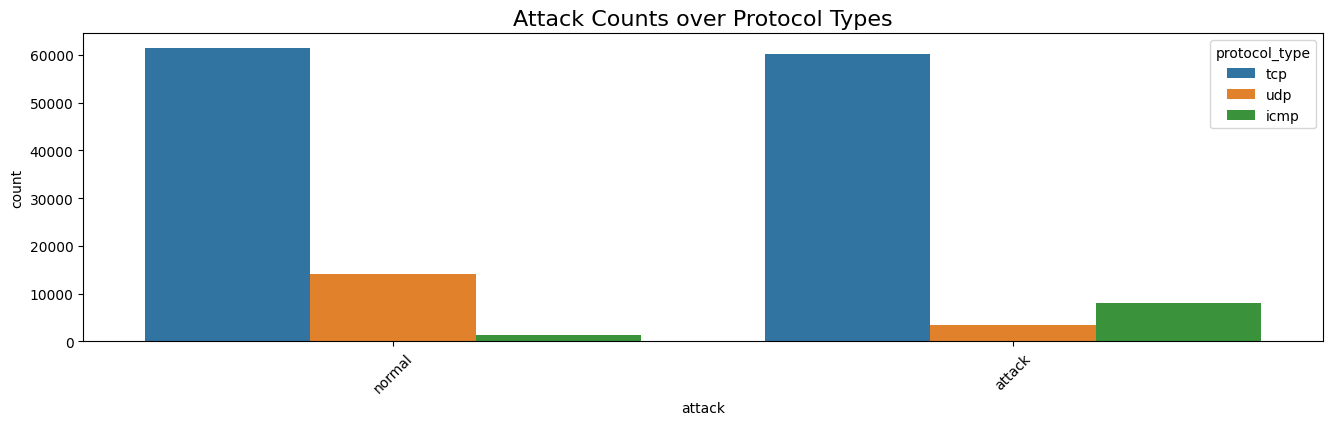

In [ ]:
# Biểu đồ Countplot với phân loại theo 'protocol_type'
# So sánh số lượng tấn công theo từng giao thức.
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df_train,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

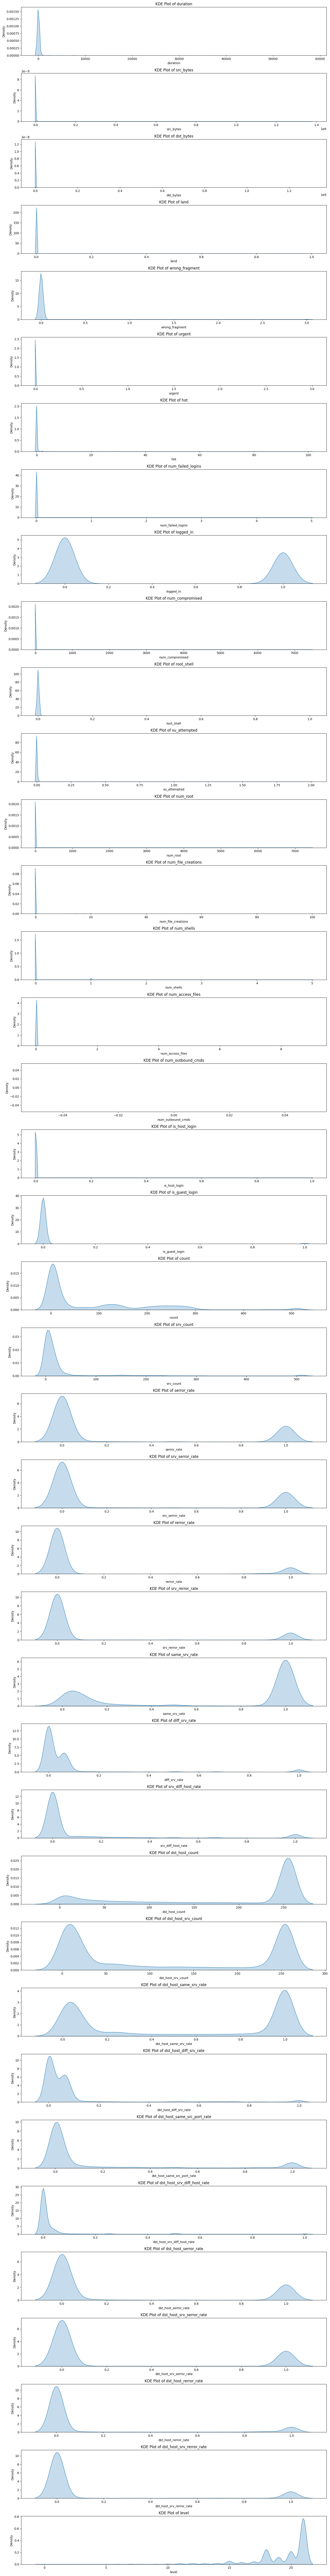

In [ ]:
# Biểu đồ Đường cong Mật độ Hạt nhân (KDE) cho các cột số
# Trực quan hóa ước tính hàm mật độ xác suất của từng cột số trong DataFrame df_train.
numeric_columns = df_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, len(numeric_columns) * 3))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1)
    sns.kdeplot(df_train[column], fill=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

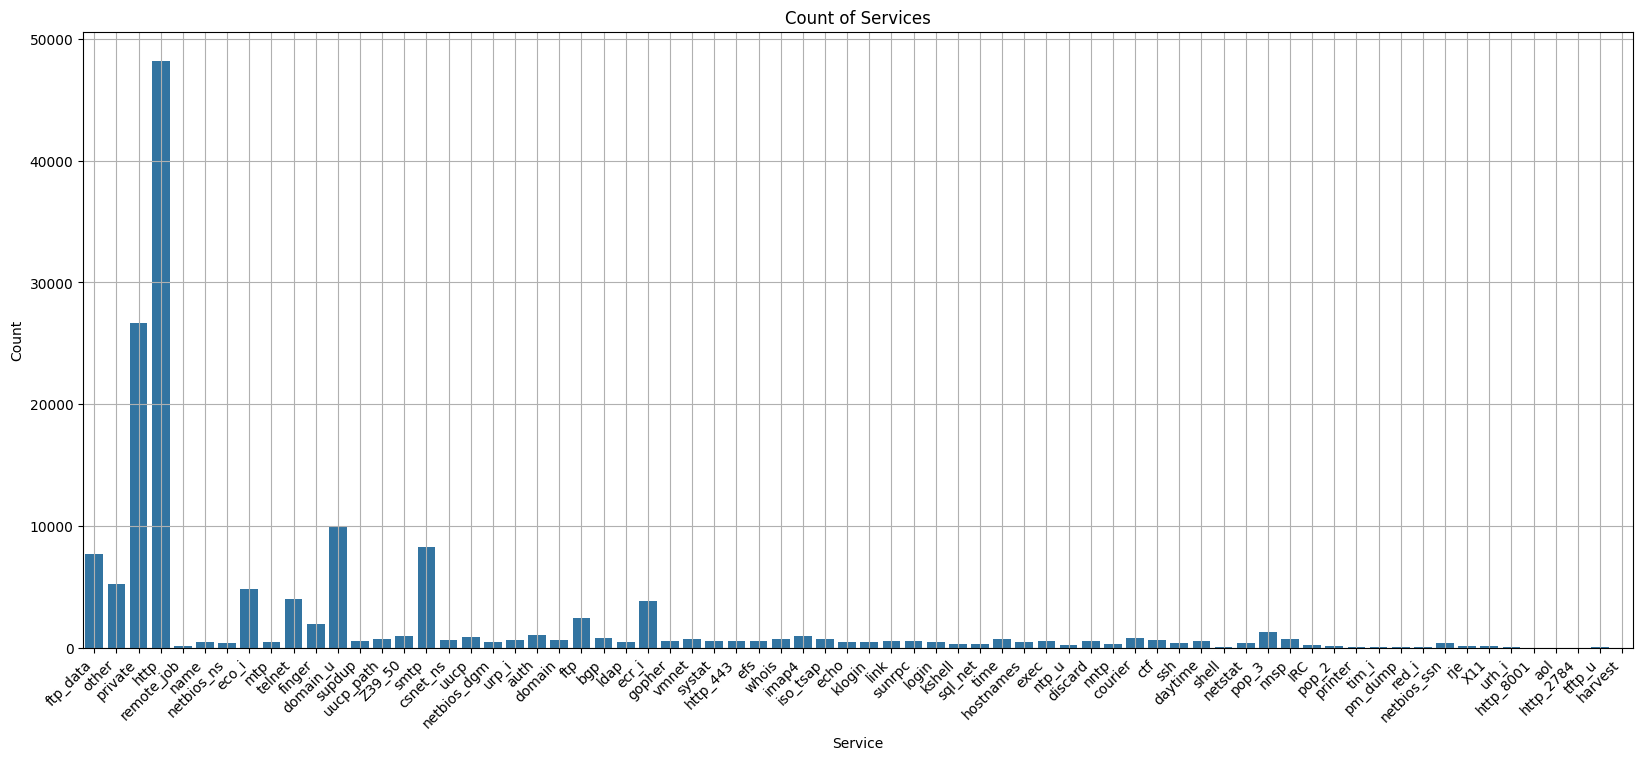

In [ ]:
# Biểu đồ Countplot cho thuộc tính 'service'
# Trực quan hóa số lượng kết nối theo từng loại dịch vụ.
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='service', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

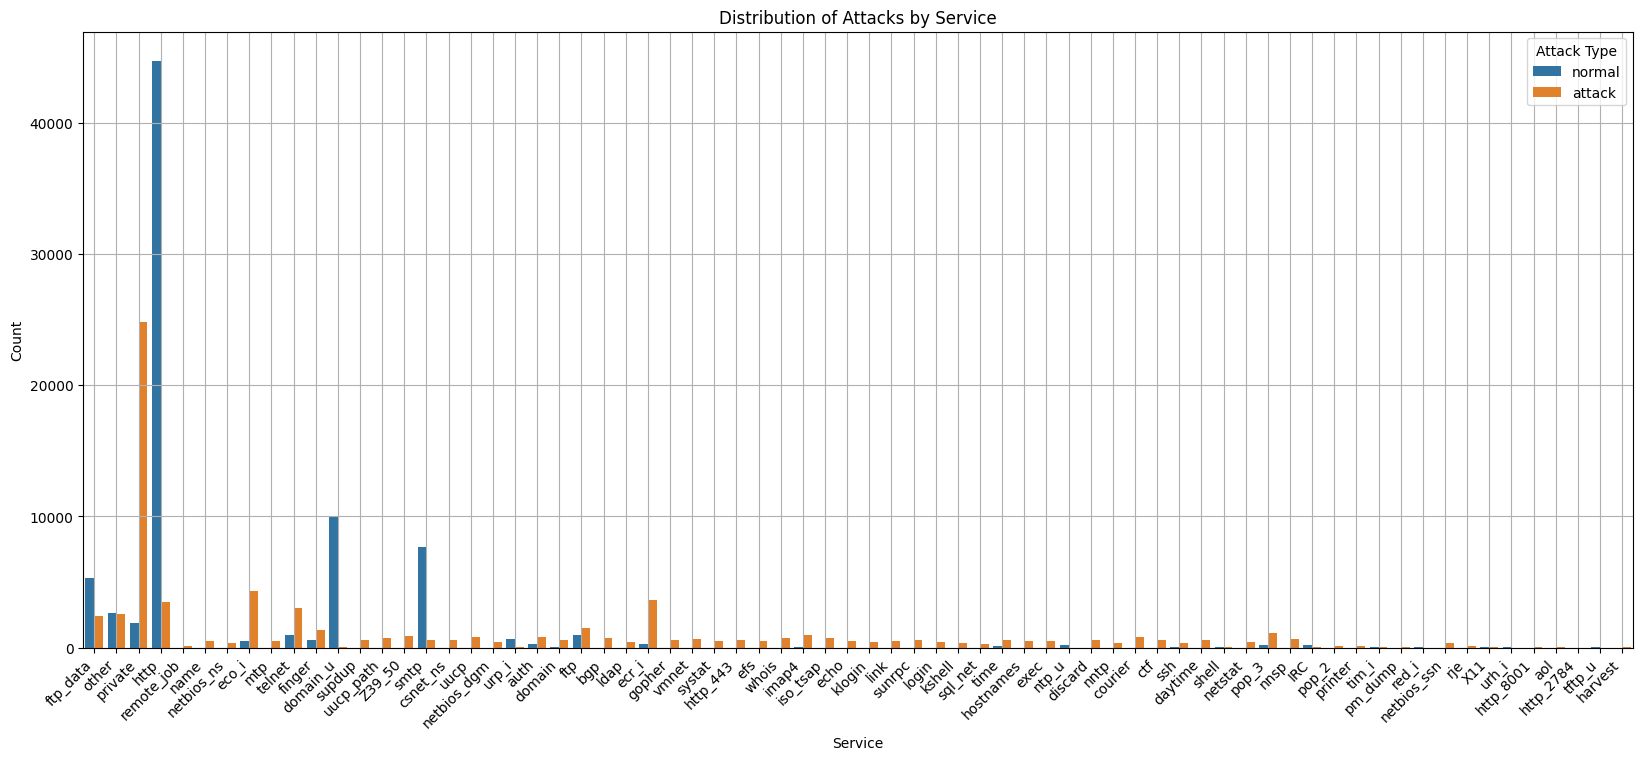

In [ ]:
# Phân phối số lượng tấn công theo từng loại dịch vụ.
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='service', hue='attack', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

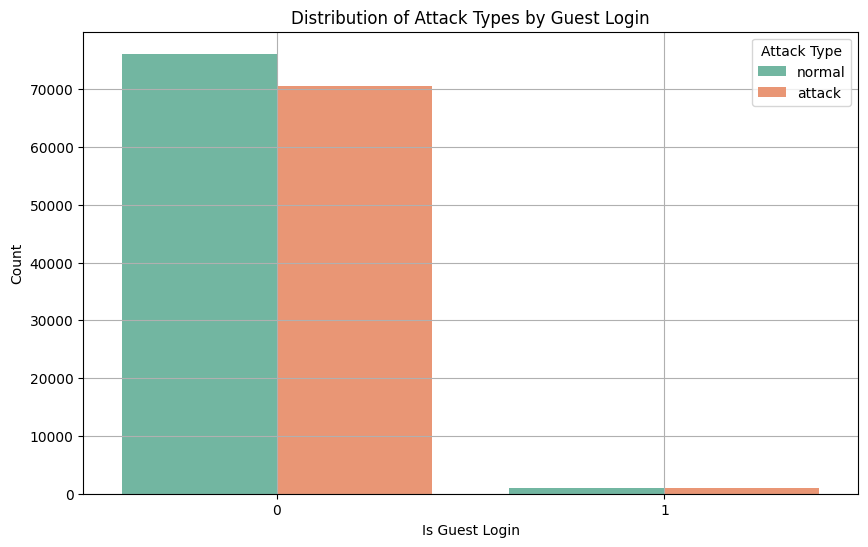

In [ ]:
# Số lượng tấn công phân theo trạng thái đăng nhập khách.
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df_train, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

# **Đánh giá hiệu năng mô hình**

In [ ]:
def evaluate_classification(model, name, x_train, x_test, y_train, y_test):
    # Dự đoán
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # Confustion Matrix
    train_confusion_matrix = metrics.confusion_matrix(y_train, train_pred)
    test_confusion_matrix = metrics.confusion_matrix(y_test, test_pred)

    # Tính toán các thông số
    train_accuracy = metrics.accuracy_score(y_train, train_pred)
    train_precision = metrics.precision_score(y_train, train_pred)
    train_recall = metrics.recall_score(y_train, train_pred)
    train_f1 = metrics.f1_score(y_train, train_pred)

    test_accuracy = metrics.accuracy_score(y_test, test_pred)
    test_precision = metrics.precision_score(y_test, test_pred)
    test_recall = metrics.recall_score(y_test, test_pred)
    test_f1 = metrics.f1_score(y_test, test_pred)

    # Tính toán AUC
    train_auc = test_auc = None
    supports_proba = hasattr(model, "predict_proba")
    if supports_proba:
        train_probs = model.predict_proba(x_train)[:, 1]
        test_probs = model.predict_proba(x_test)[:, 1]
        train_auc = roc_auc_score(y_train, train_probs)
        test_auc = roc_auc_score(y_test, test_probs)

    # In ra các chỉ số hiệu suất
    print(f"Training Metrics for {name}:")
    print(f"Accuracy: {train_accuracy*100:.2f}%, Precision: {train_precision*100:.2f}%, Recall: {train_recall*100:.2f}%, F1 Score: {train_f1*100:.2f}%" +
          (f", AUC: {train_auc*100:.2f}%" if train_auc is not None else ""))
    print(f"Testing Metrics for {name}:")
    print(f"Accuracy: {test_accuracy*100:.2f}%, Precision: {test_precision*100:.2f}%, Recall: {test_recall*100:.2f}%, F1 Score: {test_f1*100:.2f}%" +
          (f", AUC: {test_auc*100:.2f}%" if test_auc is not None else ""))

    # Vẽ Confusion Matrix
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    sns.heatmap(train_confusion_matrix, annot=True, fmt='g')
    plt.title(f'Training Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.subplot(2, 2, 2)
    sns.heatmap(test_confusion_matrix, annot=True, fmt='g')
    plt.title(f'Testing Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Vẽ đường cong ROC
    if supports_proba:
        fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
        fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)

        plt.subplot(2, 2, 3)
        plt.plot(fpr_train, tpr_train, label=f"AUC = {train_auc:.4f}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve (Train) for {name}")
        plt.legend(loc="lower right")
        plt.grid(True)

        plt.subplot(2, 2, 4)
        plt.plot(fpr_test, tpr_test, label=f"AUC = {test_auc:.4f}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve (Test) for {name}")
        plt.legend(loc="lower right")
        plt.grid(True)

# **Tiền xử lý dữ liệu**

In [ ]:
# Danh sách các cột phân loại (categorical) và nhãn (attack)
cat_cols = ['is_host_login','protocol_type','service','flag','land',
            'logged_in','is_guest_login', 'level', 'attack']


def preprocessing(df_data):
  # Lấy các cột dạng số trong dữ liệu
  df_num = df_data.drop(cat_cols, axis=1)
  num_cols = df_num.columns

  # Sử dụng Z Scaler để chuẩn hóa dữ liệu
  scaler = StandardScaler()
  df_data[num_cols] = scaler.fit_transform(df_data[num_cols])
  with open("scaler_numeric.pkl", "wb") as f:
    pickle.dump(scaler, f)

  #Xử lý dữ liệu trùng lặp
  df_data.drop_duplicates(inplace=True)

  # Nhị phân hóa nhãn 'attack'
  df_data.loc[df_data['attack'] == 'normal', 'attack'] = 0
  df_data.loc[df_data['attack'] != 0, 'attack'] = 1
  df_data['attack'] = df_data['attack'].astype(int)

  # One-hot encode cho các cột phân loại
  # One-hot encoding cho 3 cột phân loại: protocol_type, service, flag
  # => để chuyển các biến phân loại (categorical) thành dạng số (numeric) mà mô hình máy học có thể hiểu đúng ý nghĩa của dữ liệu
  # Khi dùng PCA hoặc mạng nơ-ron, bạn nên giữ One-Hot để dữ liệu tuyến tính hơn và không bị thứ tự ảo
  # Khi một cột có n giá trị phân loại khác nhau, pd.get_dummies() sẽ tạo ra n cột mới, dẫn tới số lượng cột tăng lên
  df_data = pd.get_dummies(df_data, columns=['protocol_type', 'service', 'flag'])
  dummy_cols = [c for c in df_data.columns if c.startswith("protocol_type_")
                                             or c.startswith("service_")
                                             or c.startswith("flag_")]
  print(dummy_cols)
  with open("dummy_columns.pkl", "wb") as f:
    pickle.dump(dummy_cols, f)

  return df_data

In [ ]:
df_train_preprocessed = preprocessing(df_train)

['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

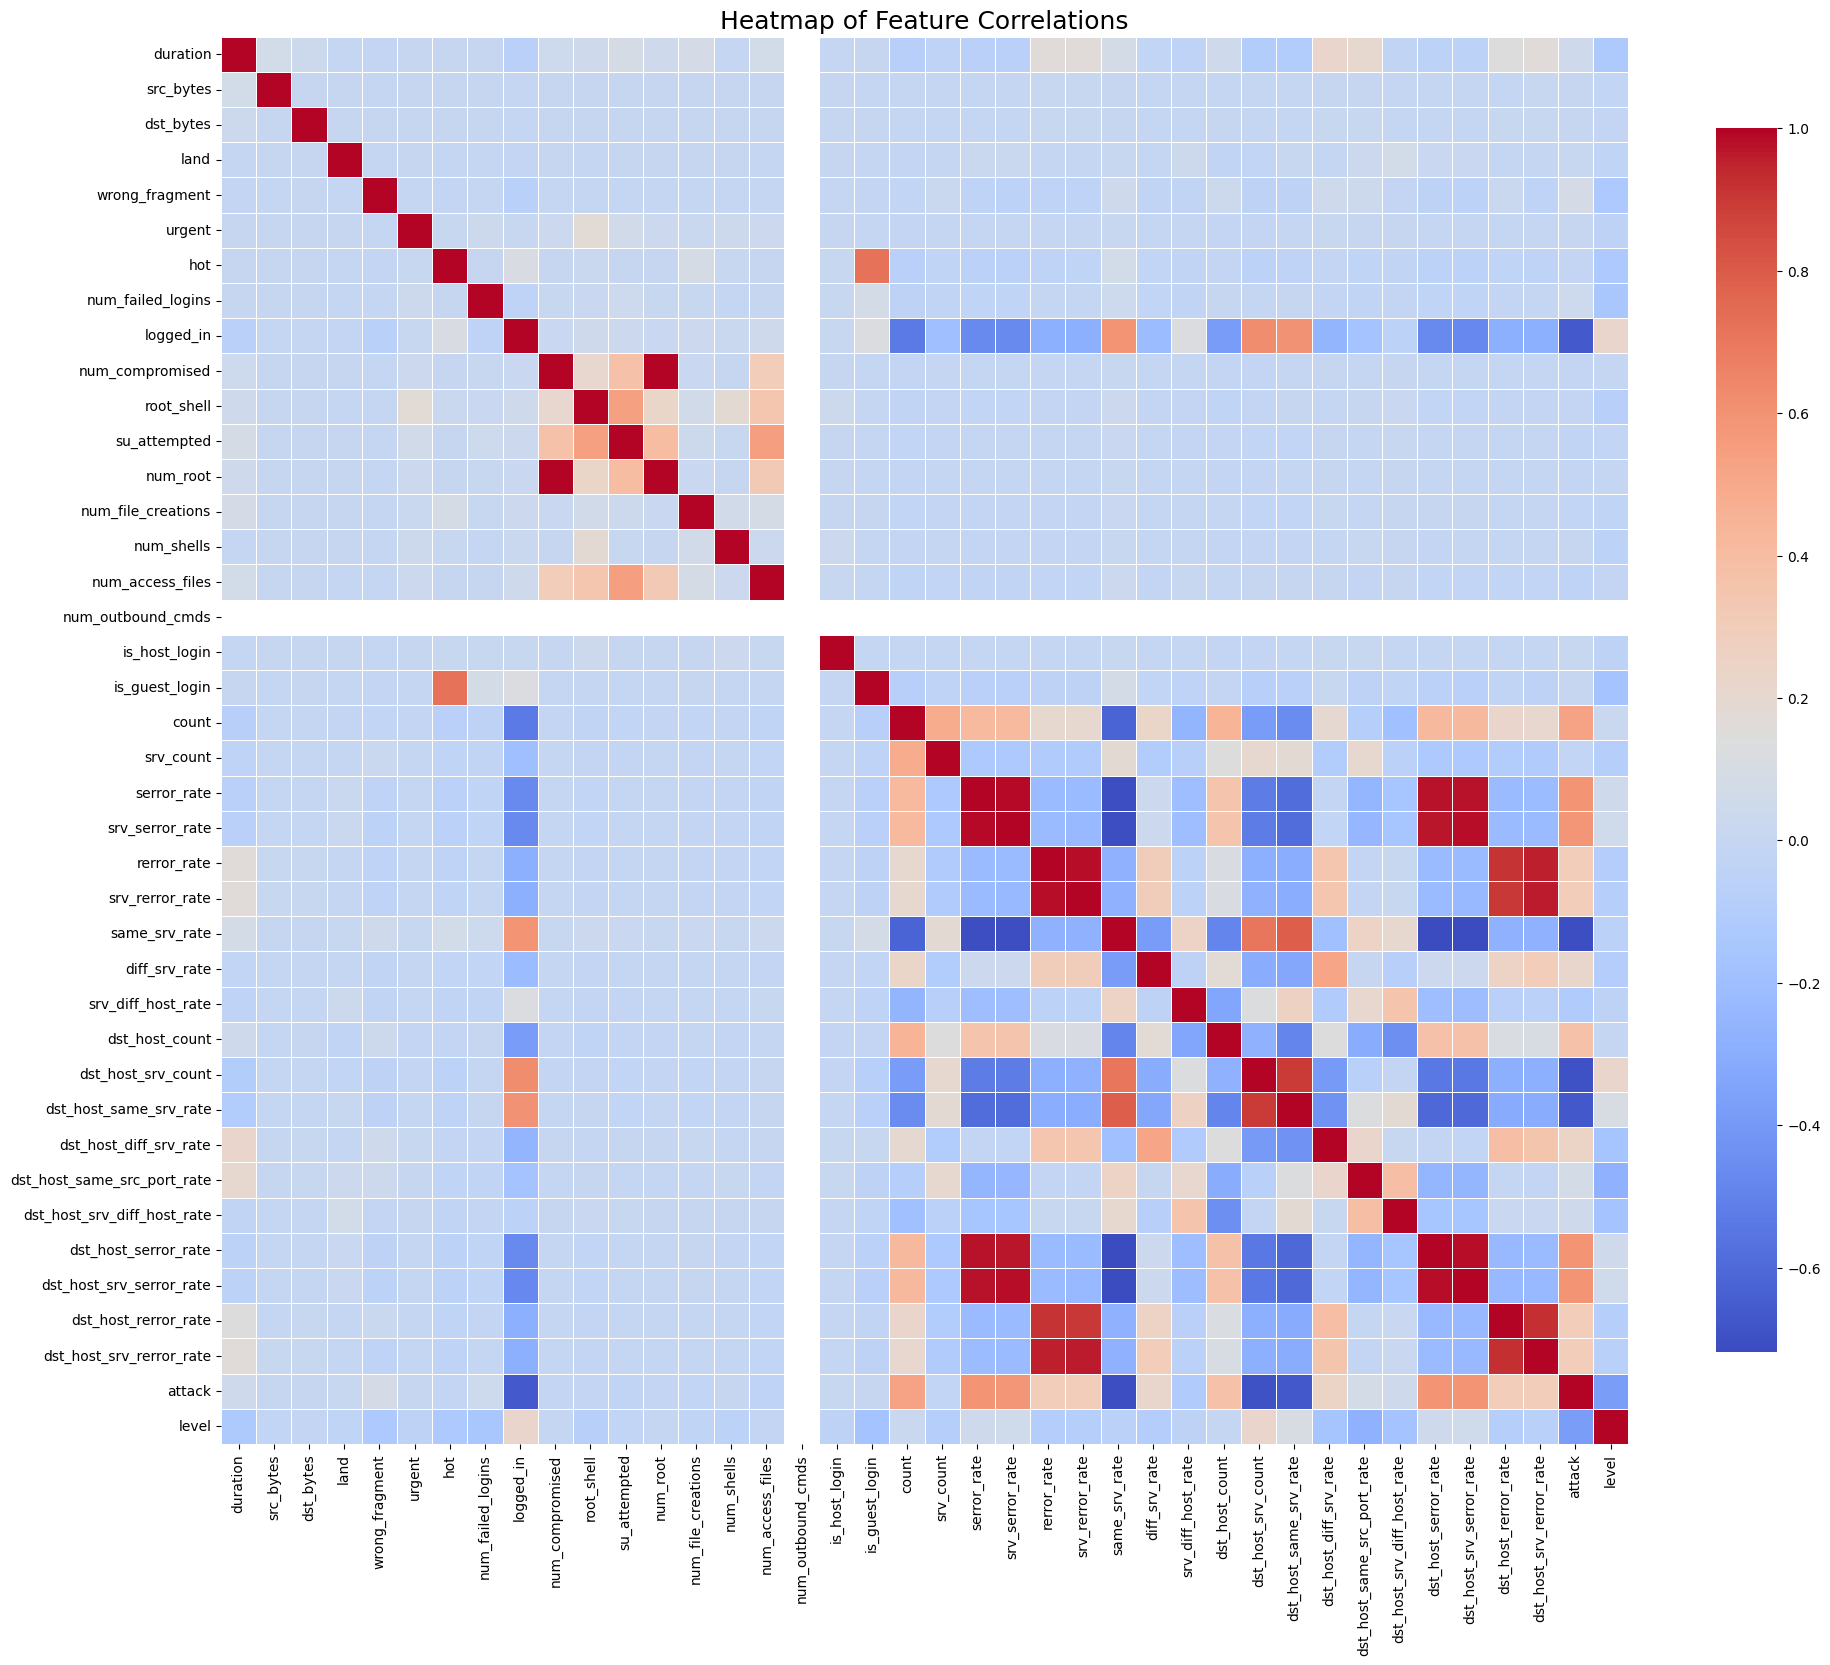

In [ ]:
# Vẽ biểu đồ heatmap hiển thị độ tương quan giữa các thuộc tính
numeric_df = df_train_preprocessed.select_dtypes(include='number')

corr = numeric_df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Heatmap of Feature Correlations", fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Tách đặc trưng và nhãn
x = df_train_preprocessed.drop(['attack'] , axis = 1) # Dữ liệu đầu vào (features)
y = df_train_preprocessed['attack']                            # Nhãn nhị phân (normal = 0, attack = 1)
y_reg = df_train_preprocessed['level']                          # Nhãn hồi quy (level 0–21)

# Giảm chiều với PCA
pca = PCA(n_components=20)    # Khởi tạo PCA giữ lại 20 thành phần chính
pca = pca.fit(x)              # Huấn luyện PCA trên toàn bộ x
x_reduced = pca.transform(x)  # Biến đổi dữ liệu sang không gian mới với 20 chiều
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int') # Chuyển nhãn y về kiểu int
# Chia tập train/test
# Cho phân loại nhị phân (dữ liệu gốc)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Cho phân loại nhị phân (sau khi PCA)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
# Cho bài toán hồi quy (predict 'level')
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 123 and of reduced features is 20


In [ ]:
with open("pca_model.pkl", "wb") as f:
    pickle.dump(pca, f)

In [ ]:
# DataFrame
x_train_reduced = pd.DataFrame(x_train_reduced, columns=[f'pc{i}' for i in range(20)])
x_test_reduced = pd.DataFrame(x_test_reduced, columns=[f'pc{i}' for i in range(20)])
x_train_reduced['attack'] = y_train_reduced.reset_index(drop=True)
x_test_reduced['attack'] = y_test_reduced.reset_index(drop=True)

In [ ]:
x_train_reduced

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,attack
0,2.108919,2.308772,-0.267764,-0.020731,0.044791,-0.613554,0.110335,0.102938,-0.069067,-0.135212,-0.066159,0.030495,-0.002092,0.108375,-0.120218,-0.092049,0.235518,-0.009251,-0.110626,0.351053,0
1,2.127659,1.965902,-0.218465,-0.014000,0.705366,-0.942396,-0.010353,0.393945,0.006475,-0.262392,-0.045535,0.051343,0.007345,0.074498,-0.213045,-0.221639,0.240077,-0.020684,0.007743,-0.115322,0
2,1.900341,2.157574,-0.101489,0.020183,-0.581471,-0.247874,-0.252591,0.480553,-0.177523,-0.122573,-0.115287,0.078621,-0.010139,-0.030633,-0.060975,-0.082338,-0.071021,-0.864497,0.002039,0.268757,0
3,-0.458612,-1.797963,5.438702,0.022812,0.494677,-0.548563,0.827457,-1.183161,0.245982,0.319393,0.417792,0.068909,-0.012771,-0.089494,0.294148,0.173564,-0.231974,0.056356,0.149817,-0.670063,1
4,-8.385776,2.206665,-2.770863,-0.328269,0.732798,-2.391602,0.970809,0.203831,-0.163929,0.248371,-0.017643,-0.267639,0.024660,0.834237,-0.152370,-0.850316,0.621808,-0.432692,0.074203,0.301155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,1.669434,3.388925,-0.380586,-0.118690,-2.385175,1.784535,-0.035485,-0.472492,-0.042108,0.154403,-0.170397,-0.057798,0.016252,-0.031705,0.074585,0.268599,0.047407,1.618384,-0.315696,0.178720,0
118306,-1.237278,-3.405836,7.114953,-0.004274,0.952327,1.759006,-1.437375,1.724137,-2.889993,0.161929,-1.380702,-0.448199,-0.022985,0.941699,-0.221669,0.687389,0.816852,-0.239088,-0.453316,2.040289,1
118307,0.490312,-1.704857,5.648518,0.052357,0.479310,-0.411278,0.720520,-1.142558,0.279172,0.322415,0.408739,0.088278,-0.011995,-0.159026,0.319242,0.212025,-0.315697,0.066475,0.137488,-0.649522,1
118308,2.049945,2.816246,-0.337579,-0.038233,-1.248879,-0.101966,0.331418,-0.332593,-0.268308,0.041134,-0.057547,-0.042383,-0.011094,0.212276,0.022506,0.204104,0.364170,0.911257,-0.307504,0.729077,0


In [ ]:
xg_boost = xgb.XGBClassifier(random_state=42)
xg_boost.fit(x_train_reduced, y_train_reduced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xg_boost.predict(x_test_reduced)
print(classification_report(y_test_reduced, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15272
           1       1.00      1.00      1.00     14306

    accuracy                           1.00     29578
   macro avg       1.00      1.00      1.00     29578
weighted avg       1.00      1.00      1.00     29578



Training Metrics for XgBoost:
Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1 Score: 100.00%, AUC: 100.00%
Testing Metrics for XgBoost:
Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1 Score: 100.00%, AUC: 100.00%


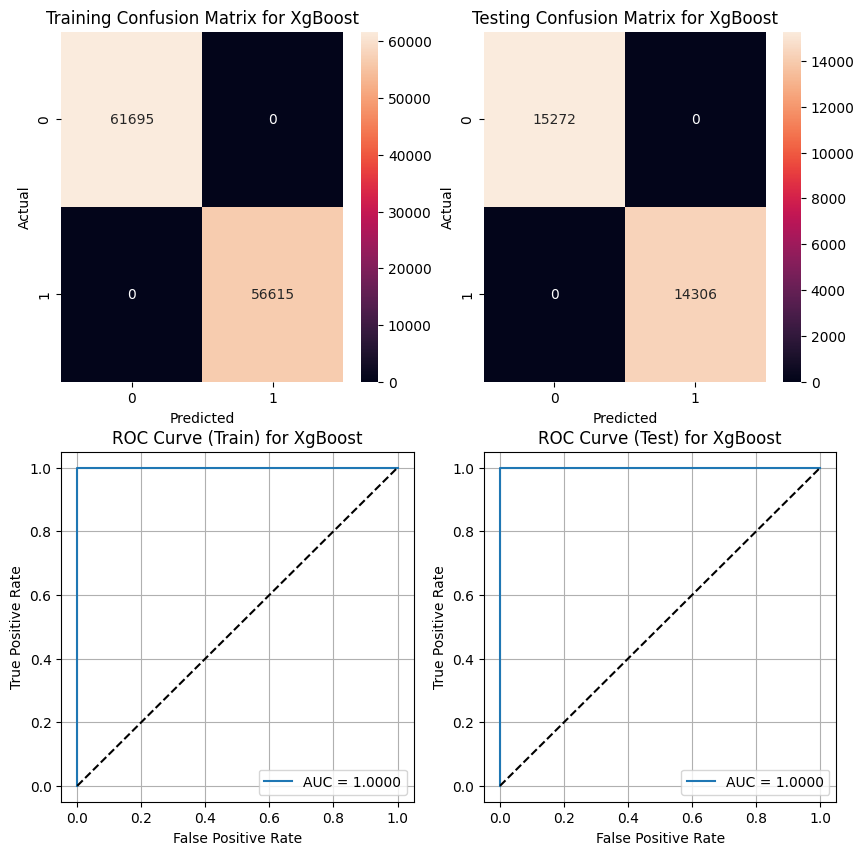

In [ ]:
evaluate_classification(xg_boost, "XgBoost", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

In [ ]:
rdf = RandomForestClassifier(n_estimators=100, random_state=42)
rdf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rdf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15272
           1       1.00      1.00      1.00     14306

    accuracy                           1.00     29578
   macro avg       1.00      1.00      1.00     29578
weighted avg       1.00      1.00      1.00     29578



Training Metrics for Random Forest:
Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1 Score: 100.00%, AUC: 100.00%
Testing Metrics for Random Forest:
Accuracy: 99.94%, Precision: 99.89%, Recall: 99.98%, F1 Score: 99.93%, AUC: 100.00%


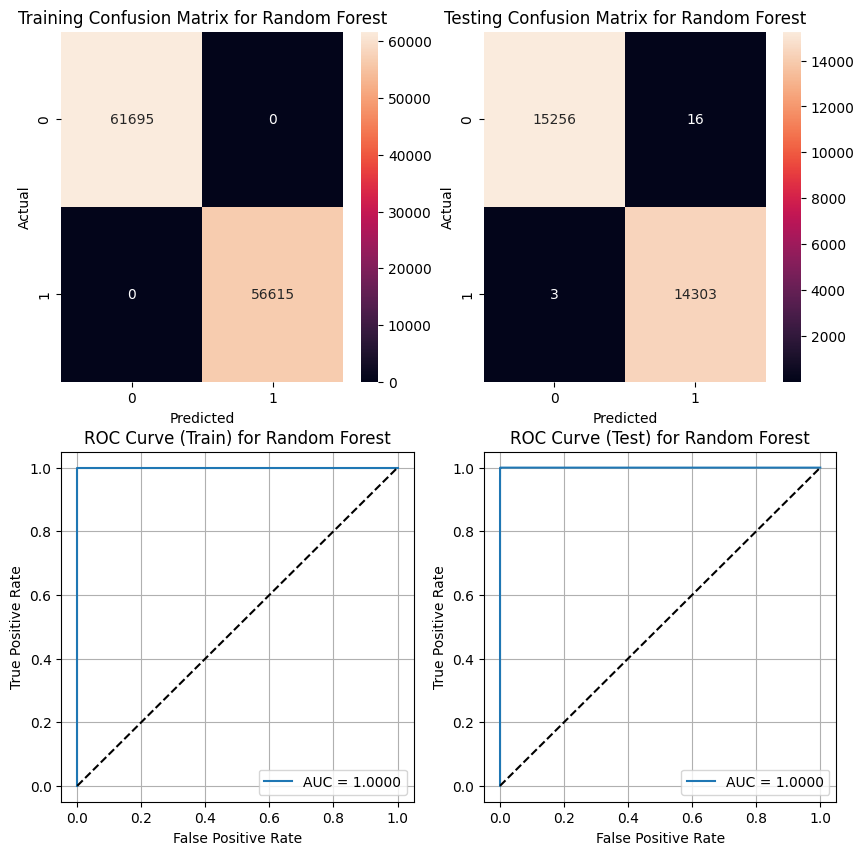

In [ ]:
evaluate_classification(rdf, "Random Forest", x_train, x_test, y_train, y_test)

In [ ]:
df_train = df_train.drop(columns=['level'])

In [ ]:
train_val_df, test_df = train_test_split(
    df_train,
    test_size=0.2,               # 20% lấy làm test
    stratify=df_train["attack"], # vẫn giữ tỉ lệ label
    random_state=42
)

In [ ]:
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.25,              # 25% * 80% = 20% tổng
    stratify=train_val_df["attack"],
    random_state=42
)

In [ ]:
data_config = DataConfig(
    target=["attack"],
    continuous_cols=[
        "duration", "src_bytes", "dst_bytes", "wrong_fragment", "urgent",
        "hot", "num_failed_logins", "num_compromised", "root_shell", "su_attempted",
        "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
        "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
        "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
        "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
        "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
        "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
        "dst_host_srv_rerror_rate"
    ],
    categorical_cols=["protocol_type", "service", "flag"]
)

In [ ]:
trainer_config = TrainerConfig(
    batch_size=2048,
    max_epochs=50,
    accelerator="gpu",
    early_stopping_mode='min',
    early_stopping_patience=10,
    load_best=True,  # hoặc set False để tắt hoàn toàn load lại
    checkpoints=None
)

In [ ]:
optimizer = OptimizerConfig(
    optimizer="AdamW",
    optimizer_params={"weight_decay": 1e-4}
)

In [ ]:
model_config = FTTransformerConfig(
    task="classification",
    learning_rate=1e-4,
    embedding_dims=None,
    embedding_dropout=0.1,
    attn_dropout=0.2,
    ff_dropout=0.2,
    add_norm_dropout=0.2,
    transformer_activation="GELU"
)


In [ ]:
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer,
    trainer_config=trainer_config
)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off


In [ ]:
tabular_model.fit(train=train_df, validation=val_df)

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Training Started
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  247 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  5.1 K │ train │
│ 2 │ _head            │ LinearHead            │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss      │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 252 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 252 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 117                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed


In [ ]:
y_pred=tabular_model.predict(test_df)

In [ ]:
y_pred_labels = y_pred["attack_prediction"]

# In classification report
print(classification_report(test_df['attack'], y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15394
           1       0.97      0.99      0.98     14184

    accuracy                           0.98     29578
   macro avg       0.98      0.98      0.98     29578
weighted avg       0.98      0.98      0.98     29578




Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15394
           1       0.97      0.99      0.98     14184

    accuracy                           0.98     29578
   macro avg       0.98      0.98      0.98     29578
weighted avg       0.98      0.98      0.98     29578


Confusion Matrix:
[[14953   441]
 [  181 14003]]

Performance Metrics:
Accuracy: 0.9790
Precision: 0.9695
Recall: 0.9872
F1 Score: 0.9783
ROC AUC: 0.9793


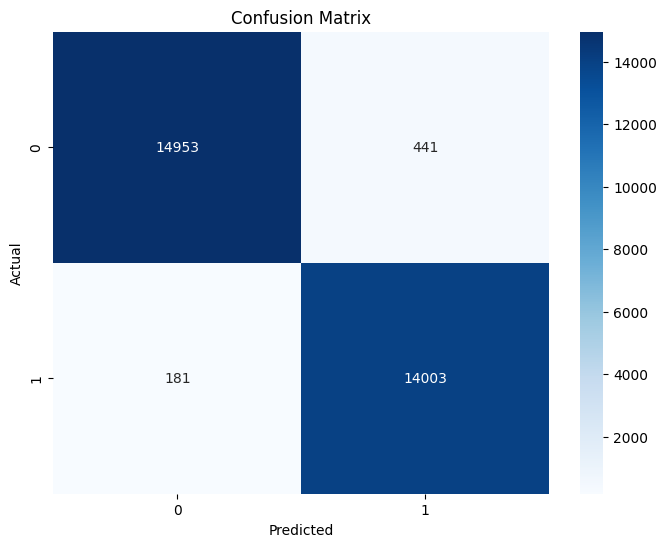

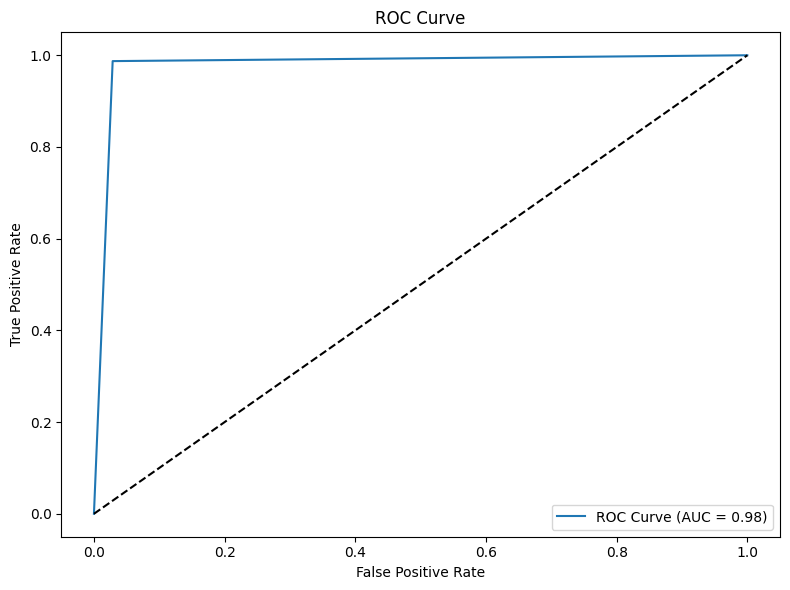

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score,
    confusion_matrix,
    classification_report
)

y_pred_labels = y_pred["attack_prediction"]  # Lớp dự đoán (0/1)

# Kiểm tra cấu trúc đầu ra để lấy xác suất
if 'attack_probability' in y_pred.columns:
    y_probs = y_pred['attack_probability']  # Xác suất lớp dương (1)
elif '1' in y_pred.columns:
    y_probs = y_pred['1']  # Xác suất lớp dương (1)
else:
    # Nếu không tìm thấy cột xác suất, tạo giá trị giả định
    y_probs = y_pred_labels.astype(float)
    print("Warning: Probability column not found - using predicted labels as proxy")

# 2. Đánh giá cơ bản
print("\nClassification Report:")
print(classification_report(test_df['attack'], y_pred_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(test_df['attack'], y_pred_labels))

# 3. Tính toán các metrics
metrics = {
    'Accuracy': accuracy_score(test_df['attack'], y_pred_labels),
    'Precision': precision_score(test_df['attack'], y_pred_labels),
    'Recall': recall_score(test_df['attack'], y_pred_labels),
    'F1 Score': f1_score(test_df['attack'], y_pred_labels)
}

# 4. Tính ROC AUC nếu có thể
try:
    metrics['ROC AUC'] = roc_auc_score(test_df['attack'], y_probs)
except Exception as e:
    print(f"\nCould not calculate ROC AUC: {str(e)}")
    metrics['ROC AUC'] = None

# In metrics
print("\nPerformance Metrics:")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}" if isinstance(value, (int, float)) else f"{name}: {value}")

# 5. Visualization
plt.figure(figsize=(8, 6))

# Confusion Matrix
sns.heatmap(confusion_matrix(test_df['attack'], y_pred_labels),
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# ROC Curve (nếu có xác suất)
if 'ROC AUC' in metrics and metrics['ROC AUC'] is not None:
    plt.figure(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(test_df['attack'], y_probs)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["ROC AUC"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
with open('new_tabular_model.pkl', 'wb') as file:
    pickle.dump(tabular_model, file)